<a href="https://colab.research.google.com/github/mmorra13/Intro-To-ML/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Importing .csv data
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head() #Show first 5 of .csv data to confirm import success


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [90]:
# Separate each input variable and output
X1 = sample.values[:,0] # Input variable X1 from first column
X2 = sample.values[:,1] # Input variable X2 from second column
X3 = sample.values[:,2] # Input variable X3 from third column
Y = sample.values[:,3] #Output Y from fourth column
M1 = len(X1) # Number of training examples
M2 = len(X2) # Number of training examples
M3 = len(X3) # Number of training examples
N = len(Y) # Number of training examples

#Display first 5 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('Y = ', Y[: 5])
print('M1 = ', M1)
print('M2 = ', M2)
print('M3 = ', M3)
print('N = ', N)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
M1 =  100
M2 =  100
M3 =  100
N =  100


In [91]:
# Display more of .csv
from IPython.display import display
display(sample)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [92]:
# Preparing X1
X1_ones = np.ones((M1,1)) # Creating column vector of ones
X1_reshape = X1.reshape(M1,1) #Reshape X1 to make a 2D array suitable for matrix operations
X1_reshape[:10] # Showing the change to be vertical
X1 = np.hstack((X1_ones, X1_reshape)) # Stacking ones vector and X1 data into the same array as adjacent columns
X1[:5] # Showing the above

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [93]:
# Preparing X2
X2_ones = np.ones((M2,1)) # Creating column vector of ones
X2_reshape = X2.reshape(M2,1) #Reshape X1 to make a 2D array suitable for matrix operations
X2_reshape[:10] # Showing the change to be vertical
X2 = np.hstack((X2_ones, X2_reshape)) # Stacking ones vector and X1 data into the same array as adjacent columns
X2[:5] # Showing the above

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [94]:
# Preparing X3
X3_ones = np.ones((M3,1)) # Creating column vector of ones
X3_reshape = X3.reshape(M3,1) #Reshape X1 to make a 2D array suitable for matrix operations
X3_reshape[:10] # Showing the change to be vertical
X3 = np.hstack((X3_ones, X3_reshape)) # Stacking ones vector and X1 data into the same array as adjacent columns
X3[:5] # Showing the above

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [95]:
theta1 = np.zeros(2) # Initializing thetas for X1 as 0
theta2 = np.zeros(2) # Initializing thetas for X2 as 0
theta3 = np.zeros(2) # Initializing thetas for X3 as 0

In [96]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [97]:
# Compute the cost for theta values of X1
cost1 = compute_cost(X1, Y, theta1)
print('The cost for given values of theta_0 and theta_1 of X1 =', cost1)

The cost for given values of theta_0 and theta_1 of X1 = 5.524438459196242


In [98]:
# Compute the cost for theta values of X2
cost2 = compute_cost(X2, Y, theta2)
print('The cost for given values of theta_0 and theta_1 of X2 =', cost2)

The cost for given values of theta_0 and theta_1 of X2 = 5.524438459196242


In [99]:
# Compute the cost for theta values of X3
cost3 = compute_cost(X3, Y, theta3)
print('The cost for given values of theta_0 and theta_1 of X3 =', cost3)

The cost for given values of theta_0 and theta_1 of X3 = 5.524438459196242


In [100]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [101]:
# Defining parameters needed for gradient descent
iterations = 1500 # Number provided
alpha1 = 0.1 # Explore different values between 0.1 and 0.01, choose best for X1
alpha2 = 0.1 # Explore different values between 0.1 and 0.01, choose best for X2
alpha3 = 0.1 # Explore different values between 0.1 and 0.01, choose best for X3

In [102]:
 # Gradient descent for X1
theta1, cost_history1 = gradient_descent(X1, Y, theta1, alpha1, iterations)
print('Final value of theta for X1 = ', theta1)
print('cost_history1 = ', cost_history1)

Final value of theta for X1 =  [ 5.92794892 -2.03833663]
cost_history1 =  [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


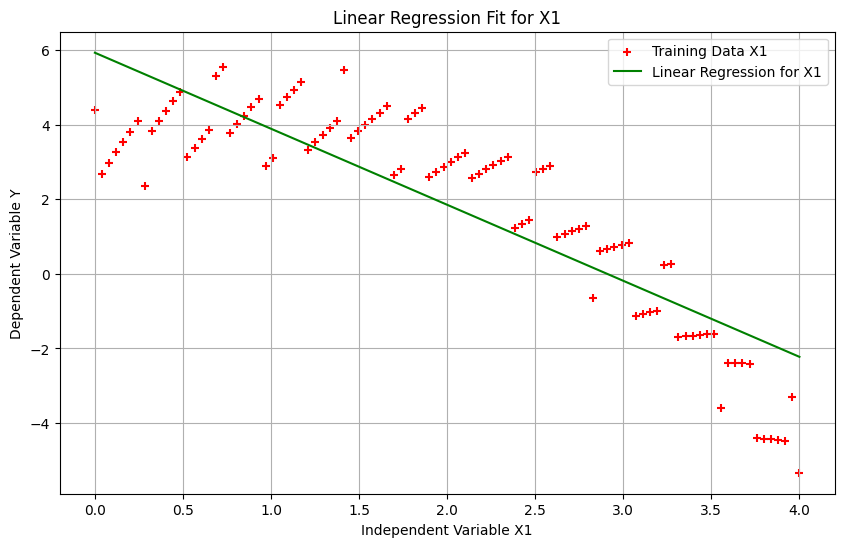

In [103]:
#Scatter plot for the training data X1
plt.scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data X1')

#Line plot for the linear regression moidel
plt.plot(X1[:,1], X1.dot(theta1), color='green', label='Linear Regression for X1')

#Plot customizations
plt.rcParams["figure.figsize"]=(10,6)
plt.grid(True)
plt.xlabel('Independent Variable X1')
plt.ylabel('Dependent Variable Y')
plt.title('Linear Regression Fit for X1')
plt.legend()

# Show the plot
plt.show()


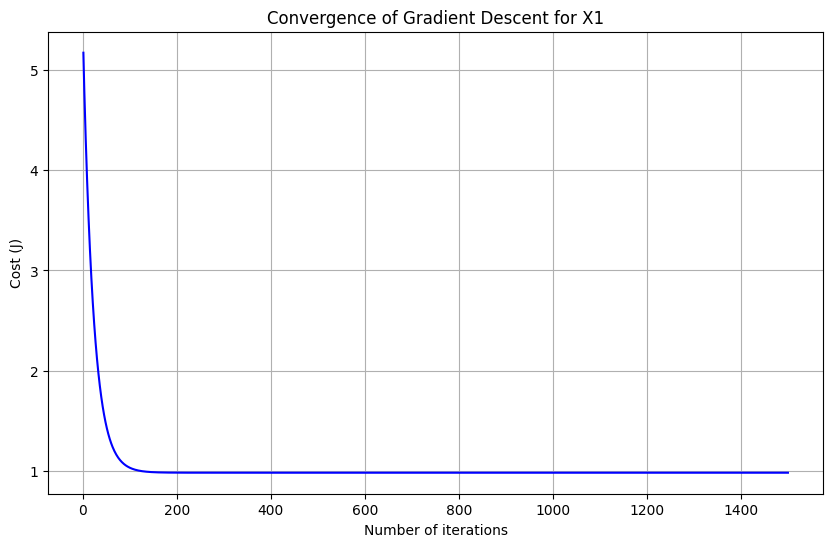

In [104]:
#Convergence of gradient descent for X1
plt.plot(range(1, iterations + 1), cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for X1')

# Show the plot
plt.show()


In [105]:
# Gradient descent for X2
theta2, cost_history2 = gradient_descent(X2, Y, theta2, alpha2, iterations)
print('Final value of theta for X2 = ', theta2)
print('cost_history2 = ', cost_history2)

Final value of theta for X2 =  [0.73606043 0.55760761]
cost_history2 =  [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


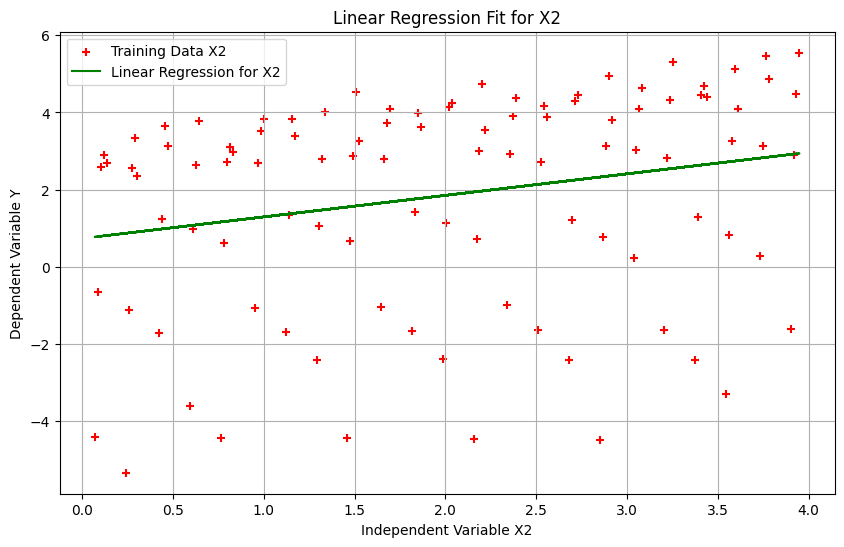

In [106]:
#Scatter plot for the training data X2
plt.scatter(X2[:, 1], Y, color='red', marker='+', label='Training Data X2')

#Line plot for the linear regression moidel
plt.plot(X2[:,1], X2.dot(theta2), color='green', label='Linear Regression for X2')

#Plot customizations
plt.rcParams["figure.figsize"]=(10,6)
plt.grid(True)
plt.xlabel('Independent Variable X2')
plt.ylabel('Dependent Variable Y')
plt.title('Linear Regression Fit for X2')
plt.legend()

# Show the plot
plt.show()


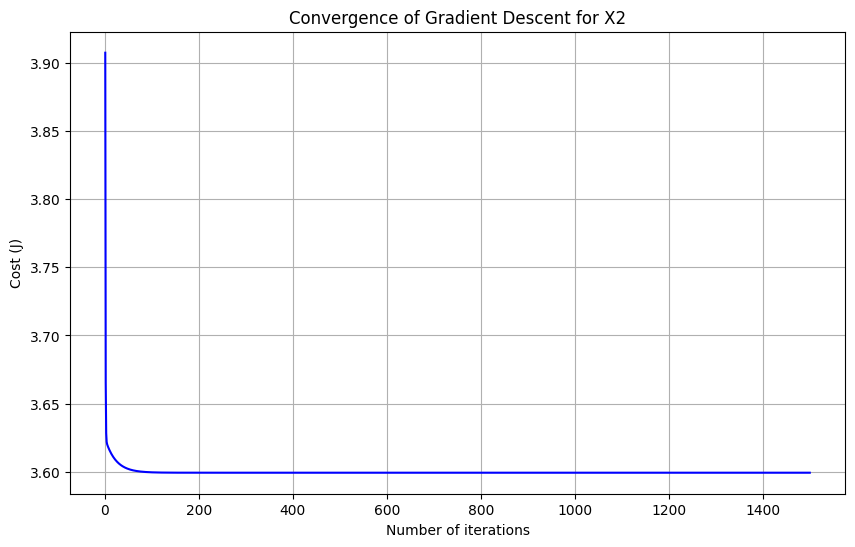

In [107]:
#Convergence of gradient descent for X2
plt.plot(range(1, iterations + 1), cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for X2')

# Show the plot
plt.show()


In [108]:
# Gradient descent for X3
theta3, cost_history3 = gradient_descent(X3, Y, theta3, alpha3, iterations)
print('Final value of theta for X3 = ', theta3)
print('cost_history3 = ', cost_history3)

Final value of theta for X3 =  [ 2.8714221  -0.52048288]
cost_history3 =  [4.66843939 4.49602325 4.43685075 ... 3.62945112 3.62945112 3.62945112]


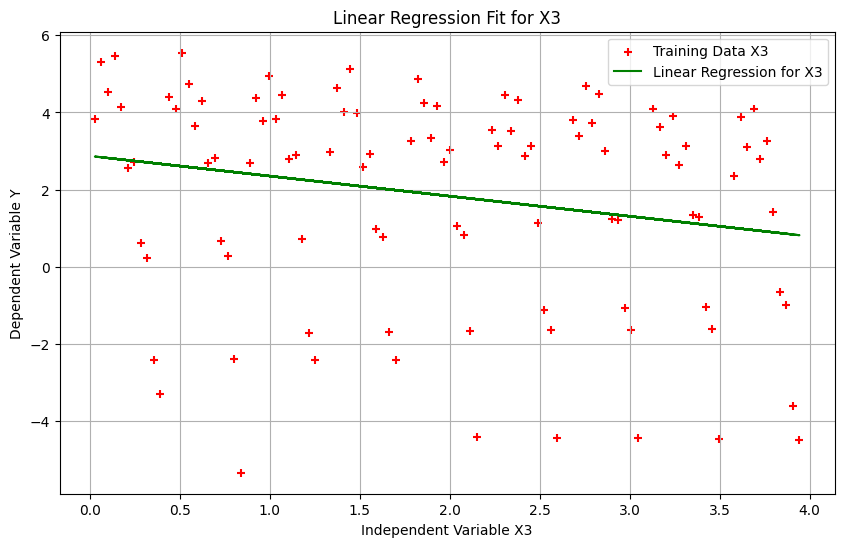

In [109]:
#Scatter plot for the training data X3
plt.scatter(X3[:, 1], Y, color='red', marker='+', label='Training Data X3')

#Line plot for the linear regression moidel
plt.plot(X3[:,1], X3.dot(theta3), color='green', label='Linear Regression for X3')

#Plot customizations
plt.rcParams["figure.figsize"]=(10,6)
plt.grid(True)
plt.xlabel('Independent Variable X3')
plt.ylabel('Dependent Variable Y')
plt.title('Linear Regression Fit for X3')
plt.legend()

# Show the plot
plt.show()


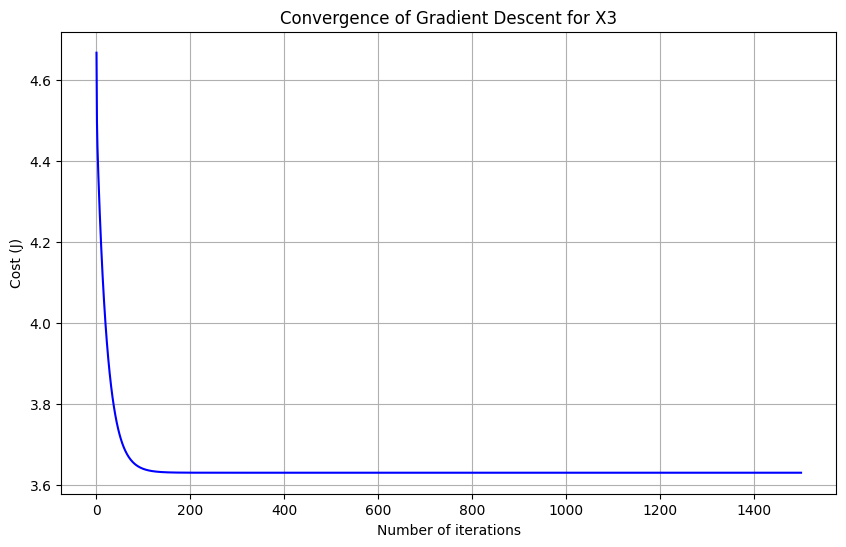

In [110]:
#Convergence of gradient descent for X3
plt.plot(range(1, iterations + 1), cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for X3')

# Show the plot
plt.show()


In [111]:
sample.head() #Show first 5 of .csv data to confirm import success

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [112]:
X1_new = sample.values[:,0] # Input variable X1 from first column
X2_new = sample.values[:,1] # Input variable X2 from second column
X3_new = sample.values[:,2] # Input variable X3 from third column

# Preparing X1 as a base
X1_new_ones = np.ones((M1,1)) # Creating column vector of ones
X1_new_reshape = X1_new.reshape(M1,1) #Reshape X1 to make a 2D array suitable for matrix operations
X1_new_reshape[:10] # Showing the change to be vertical
X1_new = np.hstack((X1_new_ones, X1_new_reshape)) # Stacking ones vector and X1 data into the same array as adjacent columns
X1_new[:5] # Showing the above

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [113]:
#Preparing X2 to be combined
X2_new = X2_new.reshape(M2,1) #Reshape X2 to make a 2D array suitable for matrix operations
X2_new[:10] #Showing change to be vertical

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [114]:
#Preparing X3 to be combined
X3_new = X3_new.reshape(M3,1) #Reshape X3 to make a 2D array suitable for matrix operations
X3_new[:10] #Showing change to be vertical

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [115]:
# Combing input variable into one array
X_Combined = np.hstack((X1_new, X2_new, X3_new)) #Stacking 1s column X1 column with X2 and X3 columns adjacent to each other
X_Combined[:5] #Showing the combination of inputs

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [118]:
#Initializing thetas to 0
thetas = np.zeros(4) #4 thetas required for 3 input variables

#Defining alpha and iterations
alpha = 0.04 #Explore different values between 0.1 and 0.01 to find best choice

In [119]:
# Gradient descent for all input variables combines
# These values will be used in report to create h(x)
# Linear regression plot not generated, as 4-d would be required, unknown how to do
thetas_combined, cost_history_combined = gradient_descent(X_Combined, Y, thetas, alpha, iterations)
print('Final value of theta for all 3 inputs = ', thetas_combined)
print('cost_history_combined = ', cost_history_combined)

Final value of theta for all 3 inputs =  [ 5.30120817 -2.0018886   0.53470473 -0.26370234]
cost_history_combined =  [4.51455638 4.13668881 3.89647561 ... 0.73847333 0.73847326 0.73847319]


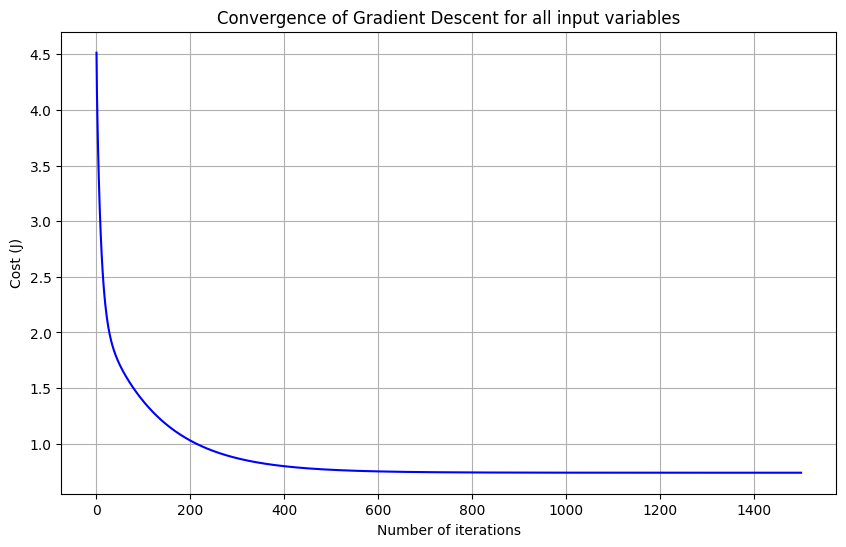

In [120]:
#Convergence of gradient descent for all input variables
plt.plot(range(1, iterations + 1), cost_history_combined, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for all input variables')

# Show the plot
plt.show()